In [3]:
import numpy as np
from tqdm import tqdm
import os
import pandas as pd

In [4]:
A = 10 ** -10
KB = 1.380649 * (10 ** -23)
ELEMENTS = {
    'He': {
        'eps': 6.03 * KB,
        'sig': 2.63 * A,
        'm': 6.67 * (10 ** -27),
        'r': 1.4 * A
    }
}
size = ELEMENTS['He']['r'] * 100
params = {
    'natoms': 10, # количество атомов (частиц)
    'element': ELEMENTS['He'], # масса
    'charge': 1, # заряд
    'radius': ELEMENTS['He']['r'] * 1, # радиус (для визуализации)
    'dt': 0.001, # временной шаг
    'k': 1, # коэф. пропорциональности
    # 'k': 10**-24, # коэф. пропорциональности
    'steps': 1000, # количество шагов
    'freq': 1, # через какое число шагов вести запись состояний
    'T': 100,
    'box': ((0, size), (0, size)),
}

In [5]:
params['box']
params['natoms']

10

In [6]:
natoms = params['natoms']
box = params['box']
dim = len(box)

pos = np.random.rand(natoms,dim)

for i in range(dim):
    pos[:,i] = box[i][0] + (box[i][1] -  box[i][0]) * pos[:,i]

In [7]:
pos

array([[1.88124969e-09, 1.29888047e-09],
       [1.87213183e-09, 3.63083590e-09],
       [1.75782856e-09, 1.05780654e-08],
       [1.15550859e-09, 7.51262772e-09],
       [9.30886836e-09, 1.12648294e-09],
       [7.51662008e-09, 7.70518013e-09],
       [1.05057438e-08, 6.28978490e-09],
       [1.06983108e-08, 2.84463151e-09],
       [8.05386305e-09, 1.13687686e-08],
       [1.13910701e-08, 5.67712592e-09]])

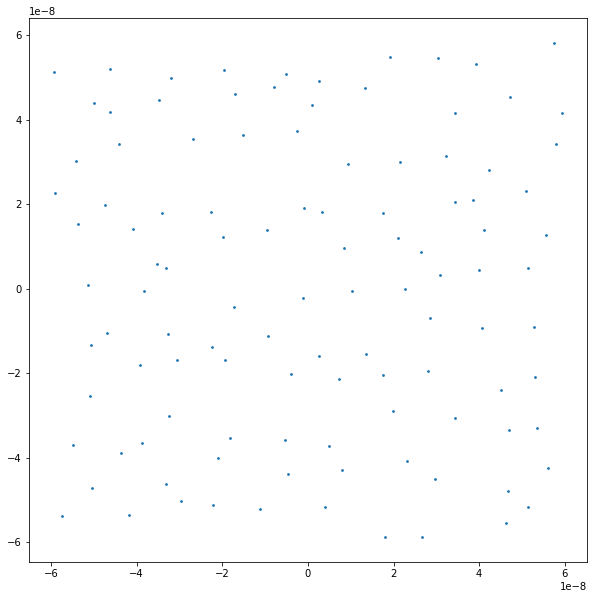

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def generate_points_with_min_distance(n, size, min_dist):
    # compute grid shape based on number of points
    num_y = np.int32(np.sqrt(n)) + 1
    num_x = np.int32(n / num_y) + 1

    # create regularly spaced neurons
    x = np.linspace(-size, size, num_x, dtype=np.float32)
    y = np.linspace(-size, size, num_y, dtype=np.float32)
    coords = np.stack(np.meshgrid(x, y), -1).reshape(-1,2)

    # compute spacing
    init_dist = np.min((x[1]-x[0], y[1]-y[0]))

    # perturb points
    max_movement = (init_dist - min_dist)/2
    noise = np.random.uniform(low=-max_movement,
                                high=max_movement,
                                size=(len(coords), 2))
    coords += noise

    return coords

r_plus_sig = 2 * 1.4 * 10**-10 + 2.63 * 10**-10
coords = generate_points_with_min_distance(n=100, size=r_plus_sig * 100, min_dist=r_plus_sig)

plt.figure(figsize=(10,10))
plt.scatter(coords[:,0], coords[:,1], s=3)
plt.show()

In [36]:
n = 100
size = r_plus_sig * 100
min_dist = r_plus_sig

# if np.sqrt(n)
num_y = np.int32(np.sqrt(n)) + 1
num_x = np.int32(n / num_y) + 1
x = np.linspace(-size, size, num_x)
y = np.linspace(-size, size, num_y)
coords = np.stack(np.meshgrid(x, y), -1).reshape(-1,2)[0:n]

init_dist = np.min((x[1]-x[0], y[1]-y[0]))
max_movement = (init_dist - min_dist)/2
noise = np.random.uniform(low=-max_movement,
                                high=max_movement,
                                size=(len(coords), 2))
coords += noise

In [37]:
len(coords)

100

In [2]:
import numpy as np

In [10]:
Rij = np.array([-15.5255126953125, -14.110847473144531], dtype=np.float64)
Rij_module = 20.979932336941868
force = 24 * 8.32531347e-16 * (2 * (2.63e-08**12) - (2.63e-08**6)) * Rij / (Rij_module**14)